# Copo de nieve de Koch

El copo de nieve de Koch, también llamado _estrella de Koch_ o *isla de Koch*, es una curva cerrada continua pero no diferenciable en ningún punto descrita por el matemático sueco Helge von Koch en 1904 en un artículo titulado «Acerca de una curva continua que no posee tangentes y obtenida por los métodos de la geometría elemental».


En lenguaje actual, diríamos que es una curva __fractal__. 
Su construcción más simple se realiza mediante un **proceso iterativo** que se inicia partiendo en tres un segmento de recta e insertando dos más en el tercero medio a manera de un triángulo equilátero, el proceso se repite infinidad de veces. 
La curva de Koch es un caso particular de curva de De Rham. 

Copo de nieve de Koch. (n.d.). En Wikipedia. Recuperada Agosto 10, 2020, de https://es.wikipedia.org/wiki/Copo_de_nieve_de_Koch


## Gráfica

Función para gráficar el copo de nieve de Koch usando matplotlib.

Tomado de: https://matplotlib.org/3.2.2/gallery/lines_bars_and_markers/fill.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

Uso básico

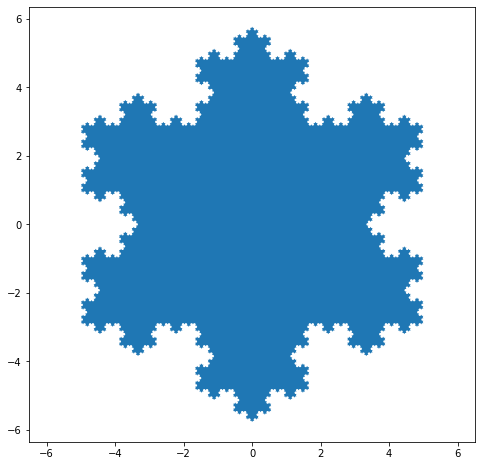

In [2]:
x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()

Uso de parámetros para modificar la imagen.

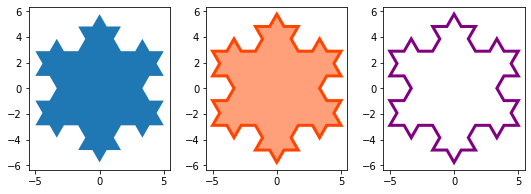

In [3]:
x, y = koch_snowflake(order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

Gráficar las primeras cinco iteraciones del copo de nieve de Koch.

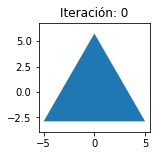

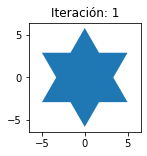

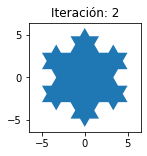

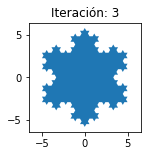

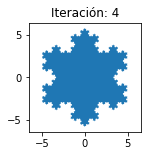

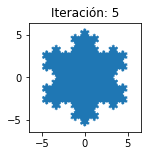

In [4]:
for order in range(6):
    x, y = koch_snowflake(order=order)
    plt.figure(figsize=(2, 2))
    plt.axis('equal')
    plt.fill(x, y)
    plt.title('Iteración: ' + str(order))
    plt.show()

## Perímetro y área

### Perímetro

El perímetro de la n-esima iteración del copo de nieve de Koch es:

$P_n=3s \left( \dfrac{4}{3} \right) ^n$

In [5]:
def koch_snowflake_perimetro(order, scale=10):
    """
    Return the perimeter of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    p = 3 * scale * (4/3)**order
    return p

Uso básico

In [6]:
p = koch_snowflake_perimetro(order = 5)
p

126.41975308641972

### Área

El área de la n-esima iteración del copo de nieve de Koch es:

$A_n= \dfrac{a_0}{5} \left(8-3 \left(\dfrac{4}{9} \right)^n \right) $

Donde:

$a_0 = \dfrac{s^2\sqrt 3}{4}$ 

In [7]:
def koch_snowflake_area(order, scale=10):
    """
    Return the area of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    from math import sqrt
    a_0 = scale * sqrt(3) / 4
    if order==0:
        return a_0
    else:
        A_n = a_0/5 * (8 - 3 * (4/9)**order )
        return A_n

Uso básico

In [10]:
A = koch_snowflake_area(order=5)
A

6.883148613932712

## Perímetro y área

Comparemos el perímetro y el área del copo de nieve de Koch conforme crecen las iteraciones.

In [9]:
for order in range(11):
    p = koch_snowflake_perimetro(order=order)
    p = round(p,3)
    a = koch_snowflake_area(order=order)
    a = round(a,3)
    print('Iteración: ', order, '\tPerímetro: ', p, '\tÁrea: ', a)

Iteración:  0 	Perímetro:  30.0 	Área:  4.33
Iteración:  1 	Perímetro:  40.0 	Área:  5.774
Iteración:  2 	Perímetro:  53.333 	Área:  6.415
Iteración:  3 	Perímetro:  71.111 	Área:  6.7
Iteración:  4 	Perímetro:  94.815 	Área:  6.827
Iteración:  5 	Perímetro:  126.42 	Área:  6.883
Iteración:  6 	Perímetro:  168.56 	Área:  6.908
Iteración:  7 	Perímetro:  224.746 	Área:  6.919
Iteración:  8 	Perímetro:  299.662 	Área:  6.924
Iteración:  9 	Perímetro:  399.549 	Área:  6.926
Iteración:  10 	Perímetro:  532.732 	Área:  6.927


Cuando las iteraciones tienden a infinito el perímetro tiende a infinito y el área a $\frac{8}{5}a_0$  